# Titanic - Machine Learning from Disaster

- Experimental flow

1. Data exploration
2. Data preprocessing
3. Models developement
4. Training
5. Evaluation
6. Testing
7. Results
8. Discussion


### Upload data

In [19]:
import os

PATH = "C:/Users/Ato/Documents/Programming/Python/Titanic/data/"
training_file = "train.csv"
train_path = os.path.join(PATH,training_file)

In [20]:
import pandas as pd

train = pd.read_csv(train_path)
train.head(10)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [21]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Note**: On a first instance it is visible that most females survived and most males didn't, therefore this will be a valuable feature. As for the data types, there are integers, strings (text), floats, integers + strings (Ticket), and in some classes there are **NaN** values.

Because of this, hot-encoding or label-encoding will be applied in categorical classes such as 'Sex' and 'Embarked' and text-preprocessing techniques (tokenization, stemming, lemmatizing, )will be applied to convert classes such as 'Name' into a format suitable for analysis.

Each columns' **Nan** values will be treated differently.

- After some research, binary classes should not be hot-encoded since it leads to redundancies and in some aspects, they are already in a hot-encoded form (If I give you [(0, ), (1, )], you can know the complementary column [( , 1), ( , 0)]). Therefore, only a conversion from *string* to *binary* will be applied on this class

In [22]:
train['Sex'] = train['Sex'].apply(lambda x: 0 if x == 'male' else 1)

- Below it's observable that there are no missing values in the Sex class.

In [28]:
print(f'Number of rows: {len(train)}')

Number of rows: 891


In [30]:
train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


- Lets see how alike are 'Sex' and 'Survival' classes

In [51]:
count_men = 0
count_women = 0

count_men_alive = 0
count_women_alive = 0

count_men_death = 0
count_women_death = 0

count_survival = 0
count_death = 0

number_of_passangers = len(train)

for i, survival in enumerate(train['Survived'], 0):

  if survival == 1:
    count_survival += 1
    if train['Sex'].iloc[i] == 0: # Is a man
      count_men_alive += 1
      count_men += 1
      
    elif train['Sex'].iloc[i] == 1: # Is a woman
      count_women += 1
      count_women_alive += 1
    
    else: 
      print(f"Wrong value: {train['Sex'].iloc[i]}")
  
  else:
    count_death += 1
    if train['Sex'].iloc[i] == 0: # Is a man
      count_men_death += 1
      count_men += 1
      
    elif train['Sex'].iloc[i] == 1: # Is a woman
      count_women += 1
      count_women_death += 1
    
    else: 
      print(f"Wrong value: {train['Sex'].iloc[i]}")

overall_survival_men = round((count_men_alive/number_of_passangers)*100,2)
overall_survival_women = round((count_women_alive/number_of_passangers)*100,2)

overall_death_men = round((count_men_death/number_of_passangers)*100,2)
overall_death_women = round((count_women_death/number_of_passangers)*100,2)

survival_among_men = round((count_men_alive/count_men)*100,2)
survival_among_women = round((count_women_alive/count_women)*100,2)

death_among_men = round((count_men_death/count_men)*100,2)
death_among_women = round((count_women_death/count_women)*100,2)

survival = round((count_survival/number_of_passangers)*100,2)

print(f"Number of passangers: {number_of_passangers}")
print(f"Number of men: {count_men}")
print(f"Number of women: {count_women}")
print(" ")
print(f"Deaths ALL: {count_death}")
print(f"Deaths MEN: {count_men_death}")
print(f"Deaths WOMAN: {count_women_death}")
print(" ")
print(f"Survived ALL: {count_survival}")
print(f"Survived MEN: {count_men_alive}")
print(f"Survived WOMAN: {count_women_alive}")
print(" ")
print(f"Survival: {survival} %")
print(" ")
print(f"Overall survival MEN: {overall_survival_men} %")
print(f"Overall survival WOMEN: {overall_survival_women} %")
print(" ")
print(f"Survival among MEN: {survival_among_men} %")
print(f"Survival among WOMEN: {survival_among_women} %")
print(" ")
print(f"Overall deaths MEN: {overall_death_men} %")
print(f"Overall deaths WOMEN: {overall_death_women} %")
print(" ")
print(f"Deaths among MEN: {death_among_men} %")
print(f"Deaths among WOMEN: {death_among_women} %")




Number of passangers: 891
Number of men: 577
Number of women: 314
 
Deaths ALL: 549
Deaths MEN: 468
Deaths WOMAN: 81
 
Survived ALL: 342
Survived MEN: 109
Survived WOMAN: 233
 
Survival: 38.38 %
 
Overall survival MEN: 12.23 %
Overall survival WOMEN: 26.15 %
 
Survival among MEN: 18.89 %
Survival among WOMEN: 74.2 %
 
Overall deaths MEN: 52.53 %
Overall deaths WOMEN: 9.09 %
 
Deaths among MEN: 81.11 %
Deaths among WOMEN: 25.8 %


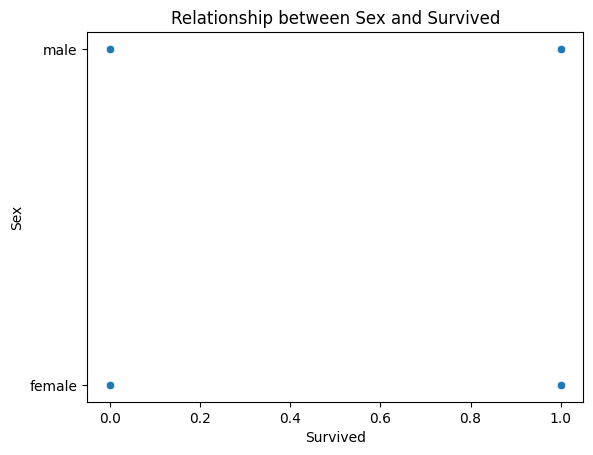

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data = train, x = 'Survived', y = 'Sex')
plt.title('Relationship between Sex and Survived')
plt.show()